In [3]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import numpy as np

In [4]:
Data_set = np.loadtxt('https://raw.githubusercontent.com/SoongMoo/soldesk20231218/main/data/ThoraricSurgery3.csv',delimiter=',')
x = Data_set[:,0:16]
y = Data_set[:,16]

In [15]:
# 구조 결정
model = Sequential()

# 딥러닝 모델의 구조를 결정
model.add(Dense(30,input_dim=16,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

In [16]:
# 모델 실행
              #손실함수 / 평균 제곱 오차와 로지스틱 회귀에서 사용한 교차 엔트로피 오차
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
# metrics : 모델 수행의 결과를 나타나게끔
     # accuracy : 학습셋에 대한 정확도에 기반해 결과를 출력
     # loss : 학흡셋에 대한 손실 값을 나타냄
     # val_acc : 테스트셋에 대한 정확도를 나타냄
     # val_loss : 테스트셋에 대한 손실 값을 나타냄


# 딥 러닝 모델을 실행.
#                 속성,클래스
# batch_size : 데이터를 몇 개의 그룹에 나눠서 실행할 것인지 지정
history = model.fit(x,y, epochs=5,batch_size=16)

Epoch 1/5
30/30 [==============================] - 0s 1ms/step - loss: 15.6683 - accuracy: 0.1489
Epoch 2/5
30/30 [==============================] - 0s 1ms/step - loss: 7.3799 - accuracy: 0.1723
Epoch 3/5
30/30 [==============================] - 0s 1ms/step - loss: 1.1221 - accuracy: 0.5298
Epoch 4/5
30/30 [==============================] - 0s 1ms/step - loss: 0.4923 - accuracy: 0.8511
Epoch 5/5
30/30 [==============================] - 0s 1ms/step - loss: 0.4619 - accuracy: 0.8511


In [24]:
x1 = [6,4.32,3.2,0,0,0,0,0,0,0,0,0,0,0,0,58]
prediction = model.predict([x1])
print(prediction)

1/1 [==============================] - 0s 24ms/step
[[0.09027671]]


In [25]:
!pip install seaborn

  Obtaining dependency information for seaborn from https://files.pythonhosted.org/packages/2d/46/cf3fce41ffc543b6e94dadbe6b647559d591df446ec716e72c3b4ce71b34/seaborn-0.13.1-py3-none-any.whl.metadata
   ---------------------------------------- 0.0/294.8 kB ? eta -:--:--
   ---------------------------------------- 0.0/294.8 kB ? eta -:--:--
   - -------------------------------------- 10.2/294.8 kB ? eta -:--:--
   ----- --------------------------------- 41.0/294.8 kB 495.5 kB/s eta 0:00:01
   ---------------- ----------------------- 122.9/294.8 kB 1.0 MB/s eta 0:00:01
   ---------------------------------------- 294.8/294.8 kB 2.0 MB/s eta 0:00:00



[notice] A new release of pip is available: 23.2.1 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [26]:
import pandas as pd

In [29]:
# 피마 인디언 당뇨병 데이터 셋
df = pd.read_csv('https://raw.githubusercontent.com/SoongMoo/soldesk20231218/main/data/pima-indians-diabetes3.csv')
df.head(5)

,pregnant,plasma,pressure,thickness,insulin,bmi,pedigree,age,diabetes
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [33]:
df['diabetes'].value_counts()
df.describe()

,pregnant,plasma,pressure,thickness,insulin,bmi,pedigree,age,diabetes
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


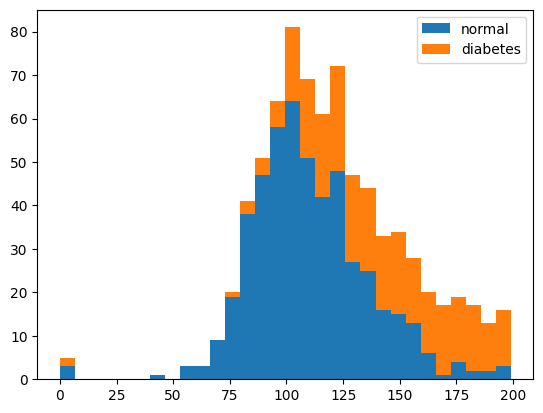

In [40]:
import matplotlib.pyplot as plt
# 당뇨인 사람의 공복 혈당과 당뇨가 아닌 사람의 공복 혈당
plt.hist(x = [df.plasma[df.diabetes==0],df.plasma[df.diabetes==1]],histtype='barstacked',bins=30,label=['normal','diabetes'])
plt.legend()

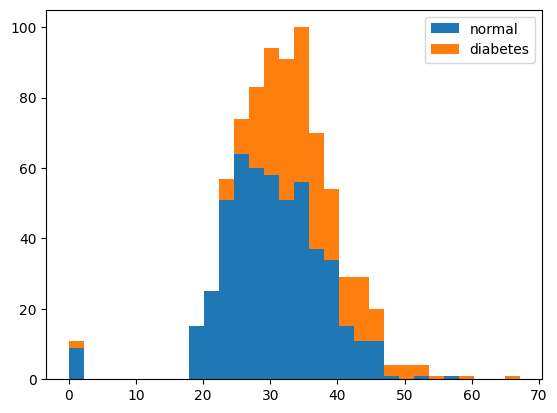

In [42]:
plt.hist(x = [df.bmi[df.diabetes==0],df.bmi[df.diabetes==1]],histtype='barstacked',bins=30,label=['normal','diabetes'])
plt.legend()

In [50]:
# 세부 정보를 x로 지정
X = df.iloc[:,0:8]
# 당뇨 여부를 y로 지정
Y = df.iloc[:,8]

model = Sequential()  # 모델 객체 생성

# 은닉층 생성
model.add(Dense(12,input_dim=8,activation='relu',name='Dense_1'))
model.add(Dense(8,activation='relu',name='Dense_2'))
model.add(Dense(4,activation='relu',name='Dense_3'))
model.add(Dense(1,activation='sigmoid',name='Dense_4'))

# 모델 실행
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
res = model.fit(X,Y,epochs=500,batch_size=5)

Epoch 1/500
154/154 [==============================] - 1s 1ms/step - loss: 2.8034 - accuracy: 0.4870
Epoch 2/500
154/154 [==============================] - 0s 1ms/step - loss: 0.7624 - accuracy: 0.5977
Epoch 3/500
154/154 [==============================] - 0s 963us/step - loss: 0.7055 - accuracy: 0.6146
Epoch 4/500
154/154 [==============================] - 0s 1ms/step - loss: 0.6693 - accuracy: 0.6367
Epoch 5/500
154/154 [==============================] - 0s 940us/step - loss: 0.6535 - accuracy: 0.6576
Epoch 6/500
154/154 [==============================] - 0s 1ms/step - loss: 0.6506 - accuracy: 0.6602
Epoch 7/500
154/154 [==============================] - 0s 1ms/step - loss: 0.6425 - accuracy: 0.6680
Epoch 8/500
154/154 [==============================] - 0s 990us/step - loss: 0.6425 - accuracy: 0.6641
Epoch 9/500
154/154 [==============================] - 0s 1ms/step - loss: 0.6323 - accuracy: 0.6680
Epoch 10/500
154/154 [==============================] - 0s 990us/step - loss: 0.6403 

In [55]:
x1 = [1,89,66,23,94,28.1,0.167,21]
prediction = model.predict([x1])
print(prediction)

1/1 [==============================] - 0s 37ms/step
[[0.1056078]]


In [61]:
df = pd.read_csv('https://raw.githubusercontent.com/SoongMoo/soldesk20231218/main/data/iris3.csv')
x = df.iloc[:,0:4]
y = df.iloc[:,4]

# 원-핫 인코딩을 사용해 문자열 처리
y = pd.get_dummies(y)

In [62]:
model = Sequential()

model.add(Dense(12,input_dim=4,activation='relu'))
model.add(Dense(8,activation='relu'))
model.add(Dense(3,activation='softmax'))    # 다중 분류인 경우는 softmax 사용.

model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])   # 소프트맥스를 사용하는 경우, 손실 함수는 categorical_crossentropy 사용.

model.fit(x,y,epochs=100,batch_size=5)

Epoch 1/100
30/30 [==============================] - 1s 1ms/step - loss: 1.0589 - accuracy: 0.3933 
Epoch 2/100
30/30 [==============================] - 0s 2ms/step - loss: 1.0250 - accuracy: 0.3267
Epoch 3/100
30/30 [==============================] - 0s 1ms/step - loss: 0.9972 - accuracy: 0.4867
Epoch 4/100
30/30 [==============================] - 0s 1ms/step - loss: 0.9727 - accuracy: 0.4267
Epoch 5/100
30/30 [==============================] - 0s 1ms/step - loss: 0.9333 - accuracy: 0.6133
Epoch 6/100
30/30 [==============================] - 0s 1ms/step - loss: 0.8941 - accuracy: 0.5800
Epoch 7/100
30/30 [==============================] - 0s 1ms/step - loss: 0.8493 - accuracy: 0.4800
Epoch 8/100
30/30 [==============================] - 0s 1ms/step - loss: 0.8014 - accuracy: 0.6533
Epoch 9/100
30/30 [==============================] - 0s 1ms/step - loss: 0.7588 - accuracy: 0.6667
Epoch 10/100
30/30 [==============================] - 0s 1ms/step - loss: 0.7199 - accuracy: 0.6667
Epoch 11

In [142]:
x11 = [6,2.2,4,1]
predict = model.predict([x11])
predicted_class = np.argmax(predict)

print(predict)
print(f'predicted_class = {predicted_class}')

if predicted_class == 0:
    print('iris-setosa')
elif predicted_class == 1:
    print('iris-versicolor')
elif predicted_class == 2:
    print('iris-verginica')

InvalidArgumentError: Graph execution error:

Detected at node sequential_27/dense_79/Relu defined at (most recent call last):
  File "<frozen runpy>", line 198, in _run_module_as_main

  File "<frozen runpy>", line 88, in _run_code

  File "C:\Users\sdedu\AppData\Local\Programs\Python\Python311\Lib\site-packages\ipykernel_launcher.py", line 17, in <module>

  File "C:\Users\sdedu\AppData\Local\Programs\Python\Python311\Lib\site-packages\traitlets\config\application.py", line 1077, in launch_instance

  File "C:\Users\sdedu\AppData\Local\Programs\Python\Python311\Lib\site-packages\ipykernel\kernelapp.py", line 701, in start

  File "C:\Users\sdedu\AppData\Local\Programs\Python\Python311\Lib\site-packages\tornado\platform\asyncio.py", line 205, in start

  File "C:\Users\sdedu\AppData\Local\Programs\Python\Python311\Lib\asyncio\windows_events.py", line 321, in run_forever

  File "C:\Users\sdedu\AppData\Local\Programs\Python\Python311\Lib\asyncio\base_events.py", line 607, in run_forever

  File "C:\Users\sdedu\AppData\Local\Programs\Python\Python311\Lib\asyncio\base_events.py", line 1922, in _run_once

  File "C:\Users\sdedu\AppData\Local\Programs\Python\Python311\Lib\asyncio\events.py", line 80, in _run

  File "C:\Users\sdedu\AppData\Local\Programs\Python\Python311\Lib\site-packages\ipykernel\kernelbase.py", line 534, in dispatch_queue

  File "C:\Users\sdedu\AppData\Local\Programs\Python\Python311\Lib\site-packages\ipykernel\kernelbase.py", line 523, in process_one

  File "C:\Users\sdedu\AppData\Local\Programs\Python\Python311\Lib\site-packages\ipykernel\kernelbase.py", line 429, in dispatch_shell

  File "C:\Users\sdedu\AppData\Local\Programs\Python\Python311\Lib\site-packages\ipykernel\kernelbase.py", line 767, in execute_request

  File "C:\Users\sdedu\AppData\Local\Programs\Python\Python311\Lib\site-packages\ipykernel\ipkernel.py", line 429, in do_execute

  File "C:\Users\sdedu\AppData\Local\Programs\Python\Python311\Lib\site-packages\ipykernel\zmqshell.py", line 549, in run_cell

  File "C:\Users\sdedu\AppData\Local\Programs\Python\Python311\Lib\site-packages\IPython\core\interactiveshell.py", line 3051, in run_cell

  File "C:\Users\sdedu\AppData\Local\Programs\Python\Python311\Lib\site-packages\IPython\core\interactiveshell.py", line 3106, in _run_cell

  File "C:\Users\sdedu\AppData\Local\Programs\Python\Python311\Lib\site-packages\IPython\core\async_helpers.py", line 129, in _pseudo_sync_runner

  File "C:\Users\sdedu\AppData\Local\Programs\Python\Python311\Lib\site-packages\IPython\core\interactiveshell.py", line 3311, in run_cell_async

  File "C:\Users\sdedu\AppData\Local\Programs\Python\Python311\Lib\site-packages\IPython\core\interactiveshell.py", line 3493, in run_ast_nodes

  File "C:\Users\sdedu\AppData\Local\Programs\Python\Python311\Lib\site-packages\IPython\core\interactiveshell.py", line 3553, in run_code

  File "C:\Users\sdedu\AppData\Local\Temp\ipykernel_2032\425592861.py", line 2, in <module>

  File "C:\Users\sdedu\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\utils\traceback_utils.py", line 65, in error_handler

  File "C:\Users\sdedu\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py", line 2655, in predict

  File "C:\Users\sdedu\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py", line 2440, in predict_function

  File "C:\Users\sdedu\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py", line 2425, in step_function

  File "C:\Users\sdedu\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py", line 2413, in run_step

  File "C:\Users\sdedu\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py", line 2381, in predict_step

  File "C:\Users\sdedu\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\utils\traceback_utils.py", line 65, in error_handler

  File "C:\Users\sdedu\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py", line 590, in __call__

  File "C:\Users\sdedu\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\utils\traceback_utils.py", line 65, in error_handler

  File "C:\Users\sdedu\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\base_layer.py", line 1149, in __call__

  File "C:\Users\sdedu\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\utils\traceback_utils.py", line 96, in error_handler

  File "C:\Users\sdedu\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\sequential.py", line 398, in call

  File "C:\Users\sdedu\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\functional.py", line 515, in call

  File "C:\Users\sdedu\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\functional.py", line 672, in _run_internal_graph

  File "C:\Users\sdedu\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\utils\traceback_utils.py", line 65, in error_handler

  File "C:\Users\sdedu\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\base_layer.py", line 1149, in __call__

  File "C:\Users\sdedu\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\utils\traceback_utils.py", line 96, in error_handler

  File "C:\Users\sdedu\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py", line 255, in call

  File "C:\Users\sdedu\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\activations.py", line 306, in relu

  File "C:\Users\sdedu\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\backend.py", line 5395, in relu

Matrix size-incompatible: In[0]: [1,4], In[1]: [60,24]
	 [[{{node sequential_27/dense_79/Relu}}]] [Op:__inference_predict_function_636569]

In [ ]:
!python.exe -m pip install --upgrade pip
!pip install scikit-learn

In [106]:

from sklearn.model_selection import train_test_split
# 학습 셋과 테스트 셋을 분리해 사용할 수 있게끔 import

df = pd.read_csv('https://raw.githubusercontent.com/SoongMoo/soldesk20231218/main/data/sonar3.csv')
x = df.iloc[:,:60]
y = df.iloc[:,60]

# 학습 셋과 테스트 셋을 분리
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,shuffle=True)

model = Sequential()
model.add(Dense(24,input_dim=60,activation='relu'))
model.add(Dense(12,activation='relu'))
model.add(Dense(6,activation='relu'))
model.add(Dense(3,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

his = model.fit(x_train,y_train,epochs=200,batch_size=5)
# 모델을 테스트셋에 적용해 정확도 확인

Epoch 1/200
29/29 [==============================] - 1s 1ms/step - loss: 0.6866 - accuracy: 0.5139
Epoch 2/200
29/29 [==============================] - 0s 1ms/step - loss: 0.6775 - accuracy: 0.5278
Epoch 3/200
29/29 [==============================] - 0s 986us/step - loss: 0.6691 - accuracy: 0.5486
Epoch 4/200
29/29 [==============================] - 0s 1ms/step - loss: 0.6607 - accuracy: 0.5625
Epoch 5/200
29/29 [==============================] - 0s 1ms/step - loss: 0.6469 - accuracy: 0.5972
Epoch 6/200
29/29 [==============================] - 0s 1ms/step - loss: 0.6386 - accuracy: 0.6042
Epoch 7/200
29/29 [==============================] - 0s 1ms/step - loss: 0.6262 - accuracy: 0.6458
Epoch 8/200
29/29 [==============================] - 0s 1ms/step - loss: 0.6058 - accuracy: 0.6806
Epoch 9/200
29/29 [==============================] - 0s 1ms/step - loss: 0.5926 - accuracy: 0.7361
Epoch 10/200
29/29 [==============================] - 0s 1ms/step - loss: 0.5800 - accuracy: 0.7431
Epoch 1

In [112]:
score = model.evaluate(x_test,y_test)
score[1]

2/2 [==============================] - 0s 4ms/step - loss: 0.5143 - accuracy: 0.9206


0.920634925365448

In [123]:
test_set = [0.02,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,0.1609,0.1582,0.2238,0.0645,0.066,0.2273,0.31,0.2999,0.5078,0.4797,0.5783,0.5071,0.4328,0.555,0.6711,0.6415,0.7104,0.808,0.6791,0.3857,0.1307,0.2604,0.5121,0.7547,0.8537,0.8507,0.6692,0.6097,0.4943,0.2744,0.051,0.2834,0.2825,0.4256,0.2641,0.1386,0.1051,0.1343,0.0383,0.0324,0.0232,0.0027,0.0065,0.0159,0.0072,0.0167,0.018,0.0084,0.009,0.0032]
predi = model.predict([test_set])
print(predi)
if predi >= 0.5:
    print('광물!')
else:
    print('비 광물!')

1/1 [==============================] - 0s 81ms/step
[[0.8785678]]
광물!


In [120]:
model.save('./data/model/my_model.hdf5')

In [121]:
del model

In [124]:
from tensorflow.keras.models import load_model
# 모델 불러오기 위해 필요함!
model = load_model('./data/model/my_model.hdf5')

In [130]:
from sklearn.model_selection import KFold # KFold를 import해야 겹 교차 검증 사용 가능.
# k(정수)겹 교차 검증
# 왜 해야 하냐? 베이스 데이터가 너무 작다면 과적합 오류가 발생할 확률이 높다. = 정확도가 떨어진다는 소리
# 데이터를 여러개로 나누어서 교차검증하여 정확도를 올린다.
k = 5
# 분할하기 전에 샘플이 치우치지 않도록 섞어준다.
kfold = KFold(n_splits = k,shuffle = True)

def model_fn():
    model = Sequential()
    model.add(Dense(24,input_dim=60,activation='relu'))
    model.add(Dense(12,activation='relu'))
    model.add(Dense(6,activation='relu'))
    model.add(Dense(3,activation='relu'))
    model.add(Dense(1,activation='sigmoid'))
    return model

acc_score = []
# k 교차 검증을 이용한 학습
for train_index , test_index in kfold.split(x):
    X_train,X_test = x.iloc[train_index,:],x.iloc[test_index,:] # 속성
    Y_train,Y_test = y.iloc[train_index],y.iloc[test_index] # 클래스
    model = model_fn()
    model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
    history = model.fit(X_train,Y_train,epochs=200,batch_size=10,verbose=0)
    # 정확도 구하기
    accuracy = model.evaluate(X_test,Y_test)[1]
    acc_score.append(accuracy)

avg_acc_score = sum(acc_score) / k
print(f'정확도 : {acc_score}')
print(f'정확도 평균 : {avg_acc_score}')

2/2 [==============================] - 0s 3ms/step - loss: 0.9451 - accuracy: 0.8780
정확도 : [0.8333333134651184, 0.8333333134651184, 0.7804877758026123, 0.9024389982223511, 0.8780487775802612]
정확도 평균 : 0.8455284357070922


In [141]:
test_set = [0.003,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,0.1609,0.1582,0.2238,0.0645,0.066,0.2273,0.31,0.2999,0.5078,0.4797,0.5783,0.5071,0.4328,0.555,0.6711,0.6415,0.7104,0.808,0.6791,0.3857,0.1307,0.2604,0.5121,0.7547,0.8537,0.8507,0.6692,0.6097,0.4943,0.2744,0.051,0.2834,0.2825,0.4256,0.2641,0.1386,0.1051,0.1343,0.0383,0.0324,0.0232,0.0027,0.0065,0.0159,0.0072,0.0167,0.018,0.0084,0.009,0.0032]
predi = model.predict([test_set])
print(predi)
if predi >= 0.5:
    print('광물!')
else:
    print('비 광물!')

1/1 [==============================] - 0s 39ms/step
[[0.96099585]]
광물!


In [144]:
df = pd.read_csv('https://raw.githubusercontent.com/SoongMoo/soldesk20231218/main/data/wine.csv')
df

,7.4,0.7,0,1.9,0.076,11,34,0.9978,3.51,0.56,9.4,5,1
0,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,1
1,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,1
2,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,1
3,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,1
4,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.99780,3.51,0.56,9.4,5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6491,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,0
6492,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,0
6493,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,0
6494,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,0


In [147]:
x = df.iloc[:,0:0+12]
y = df.iloc[:,12]

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,shuffle=True)

# 모델 구조 설정
model = Sequential()
model.add(Dense(32,input_dim=12,activation='relu'))
model.add(Dense(16,activation='relu'))
model.add(Dense(8,activation='relu'))
model.add(Dense(4,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

# epochs=100 은 순전파 100번 역전파 100번 의미               , 검증 셋 / 25%로 줬음!
#   학습 셋 60 : 검증 셋 20 : 테스트 셋 20 퍼센테이지 정도로 분할됨.
his = model.fit(x_train,y_train,epochs=100,batch_size=500,validation_split=0.25)

Epoch 1/100
8/8 [==============================] - 1s 27ms/step - loss: 0.9646 - accuracy: 0.2343 - val_loss: 0.7371 - val_accuracy: 0.3102
Epoch 2/100
8/8 [==============================] - 0s 6ms/step - loss: 0.6963 - accuracy: 0.6502 - val_loss: 0.6818 - val_accuracy: 0.8037
Epoch 3/100
8/8 [==============================] - 0s 6ms/step - loss: 0.6743 - accuracy: 0.8016 - val_loss: 0.6636 - val_accuracy: 0.8260
Epoch 4/100
8/8 [==============================] - 0s 6ms/step - loss: 0.6505 - accuracy: 0.8309 - val_loss: 0.6300 - val_accuracy: 0.8699
Epoch 5/100
8/8 [==============================] - 0s 6ms/step - loss: 0.6019 - accuracy: 0.8845 - val_loss: 0.5652 - val_accuracy: 0.9022
Epoch 6/100
8/8 [==============================] - 0s 6ms/step - loss: 0.5276 - accuracy: 0.9076 - val_loss: 0.4794 - val_accuracy: 0.9199
Epoch 7/100
8/8 [==============================] - 0s 6ms/step - loss: 0.4351 - accuracy: 0.9228 - val_loss: 0.3826 - val_accuracy: 0.9230
Epoch 8/100
8/8 [=========

In [150]:
score = model.evaluate(x_test,y_test)
score[1]

41/41 [==============================] - 0s 1ms/step - loss: 0.0992 - accuracy: 0.9754


0.9753845930099487

In [153]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

df = pd.read_csv('https://raw.githubusercontent.com/SoongMoo/soldesk20231218/main/data/wine.csv') # header=None 주면 헤더는 빼고 가져올 수도 있음!

x = df.iloc[:,0:0+12]
y = df.iloc[:,12]
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,shuffle=True)

model = Sequential()
model.add(Dense(32,input_dim=12,activation='relu'))
model.add(Dense(16,activation='relu'))
model.add(Dense(8,activation='relu'))
model.add(Dense(4,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

# 학습이 언제 자동중단 될지 설정
early_stopping_callback = EarlyStopping (monitor = 'val_loss' , patience = 20)

# 최적화 모델이 저장될 폴더와 모델의 이름을 정하기
modelpath = "./data/model/bestmodel.hdf5"
checkpointer = ModelCheckpoint(filepath=modelpath,monitor = 'val_loss',verbose=0,save_best_only=True)

# 모델 실행
history = model.fit(x_train,y_train,epochs=2000,batch_size=500,validation_split=0.25,verbose=1,callbacks=[early_stopping_callback,checkpointer])

Epoch 1/2000
8/8 [==============================] - 1s 43ms/step - loss: 3.6909 - accuracy: 0.7511 - val_loss: 1.8851 - val_accuracy: 0.7821
Epoch 2/2000
1/8 [==>...........................] - ETA: 0s - loss: 2.1302 - accuracy: 0.7500

C:\Users\sdedu\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


8/8 [==============================] - 0s 17ms/step - loss: 1.2013 - accuracy: 0.8101 - val_loss: 0.2928 - val_accuracy: 0.8884
Epoch 3/2000
8/8 [==============================] - 0s 17ms/step - loss: 0.4662 - accuracy: 0.7847 - val_loss: 0.2644 - val_accuracy: 0.9107
Epoch 4/2000
8/8 [==============================] - 0s 21ms/step - loss: 0.3614 - accuracy: 0.8958 - val_loss: 0.2429 - val_accuracy: 0.9222
Epoch 5/2000
8/8 [==============================] - 0s 22ms/step - loss: 0.2338 - accuracy: 0.9289 - val_loss: 0.2251 - val_accuracy: 0.9369
Epoch 6/2000
8/8 [==============================] - 0s 18ms/step - loss: 0.2236 - accuracy: 0.9317 - val_loss: 0.1706 - val_accuracy: 0.9446
Epoch 7/2000
8/8 [==============================] - 0s 24ms/step - loss: 0.2045 - accuracy: 0.9369 - val_loss: 0.1635 - val_accuracy: 0.9438
Epoch 8/2000
8/8 [==============================] - 0s 7ms/step - loss: 0.1911 - accuracy: 0.9412 - val_loss: 0.1663 - val_accuracy: 0.9461
Epoch 9/2000
8/8 [=========

In [156]:
score = model.evaluate(x_test,y_test)
score[1]

41/41 [==============================] - 0s 1ms/step - loss: 0.0453 - accuracy: 0.9854


0.9853846430778503